# <font color=blue> Spotify Dataset </font>

### Motivation
Spotify is one of the popular platforms where you can listen to your favorite songs, podcasts, and playlists. Navigating through their large selection of music can sometimes be tedious and challenging. And thus, we aim to build a simple recommendation algorithm using clustering ML algorithms. 
### About the Dataset
The ‘Spotify 1.2M+ Songs’ dataset is a tabular dataset consisting of audio features for over 1.2 million songs on Spotify, obtained with the Spotify API. The dataset contains information about the song’s audio characteristics such as its danceability, energy, and key etc. It also includes some categorical features detailing whether the song is explicit or not. 


#### Import Revelant Python Libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
df = pd.read_csv('Spotify_Dataset.csv')

**Clustering** refers to an unsupervised machine learning algorithm for finding subgroups, or clusters, in a data set. The spotify dataset requires an unsupervised machine learning task as we aren't interesting in predicting a target variable Y, but instead finding unknown subgroups within the observations so we may recommend favourable songs to our users. 

## <font color=red> EDA and Pre-Processing </font>

In [7]:
print(df.axes)
print(df.dtypes)

[RangeIndex(start=0, stop=1204025, step=1), Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')]
id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signatur

In [8]:
df.head(5)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [9]:
print(f"There are a total of {df.shape[1]} columns")
print(df.columns.values)

There are a total of 24 columns
['id' 'name' 'album' 'album_id' 'artists' 'artist_ids' 'track_number'
 'disc_number' 'explicit' 'danceability' 'energy' 'key' 'loudness' 'mode'
 'speechiness' 'acousticness' 'instrumentalness' 'liveness' 'valence'
 'tempo' 'duration_ms' 'time_signature' 'year' 'release_date']


The dataset contains **15** feature columns, including both categorical and numerical variables. Most of the other columns such as `id` , `name`, `album` etc are just used for identification. The `release_date` column is also redundant information to the `year` column, so we count only one of them. 

The categorical features are `explicit`, `mode`, `key`, `year`, and `time_signature`.


In [10]:
df.shape[0]

1204025

The are **1204025** samples in this dataset. 

In [11]:
df.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,7.656352e+00,1.055906e+00,4.930565e-01,5.095363e-01,5.194151e+00,-1.180870e+01,6.714595e-01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01,1.176344e+02,2.488399e+05,3.832494e+00,2.007328e+03
std,5.994977e+00,2.953752e-01,1.896694e-01,2.946839e-01,3.536731e+00,6.982132e+00,4.696827e-01,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01,3.093705e+01,1.622104e+05,5.611826e-01,1.210117e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740900e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243390e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


Some samples have variables with the given minimum value as zero. This doesn't make sense for some non-categorical features.

In [12]:
i = 0
for column in df:
    column_name = df.columns[i]
    count = (df[column]==0).sum()
    print("%s : %s" % (column_name,count))
    i = i + 1 

id : 0
name : 0
album : 0
album_id : 0
artists : 0
artist_ids : 0
track_number : 0
disc_number : 0
explicit : 1121377
danceability : 2778
energy : 297
key : 149568
loudness : 0
mode : 395571
speechiness : 2778
acousticness : 803
instrumentalness : 228846
liveness : 813
valence : 3867
tempo : 2777
duration_ms : 0
time_signature : 2809
year : 10
release_date : 0


The above code displays the **number of samples where the given variable is equal to 0**. Features such as `danceability`, `energy`, `tempo`,and `year` can not be zero. Every sample will have some aspect of `danceability` and `energy` no matter how low. `tempo` is the rate of a musical piece and a 0 tempo value would mean no music is being played at all. The reason for `year ` not being allowed to be zero is quite intiutive, so i won't expand on that further. 

In [39]:
list_of_attributes = ['danceability', 'energy', 'tempo', 'year']
for x in list_of_attributes:
    df.drop(df.loc[df[x]==0].index, inplace=True)

Since we have a huge amount of samples ~ 1.2M, we can afford to drop rows where the values of the above mentioned features are equal to **zero**. 

In [40]:
df.isnull().sum()

id                  0
name                0
album               0
album_id            0
artists             0
artist_ids          0
track_number        0
disc_number         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
year                0
release_date        0
dtype: int64

There aren't any values equal to null, so no preprocessing in required in that facet

In [41]:
df.drop(['id','name','album','album_id','artist_ids','artists','track_number','disc_number','release_date'], 
        axis=1, inplace=True)

The above columns are dropped as they are mainly used for **identification**. The `release_date` column is also dropped as it is redudant information when compared to the `year` feature.

In [42]:
df["explicit"] = df["explicit"].astype(int)

The `explicit` column which decribes whether a song was explicit or not was listed as **boolean**. Here, we just converted it into an interger with **0** : `False` and **1** : `True`. This is done as a preprocessing step. 

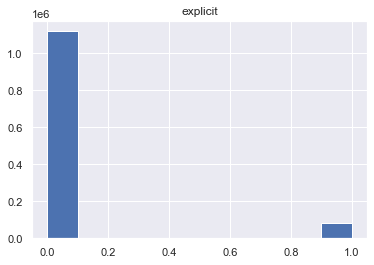

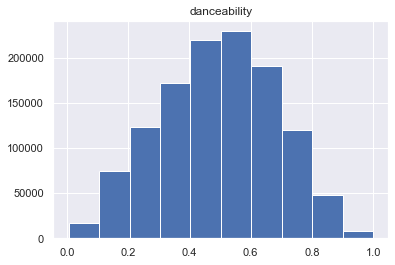

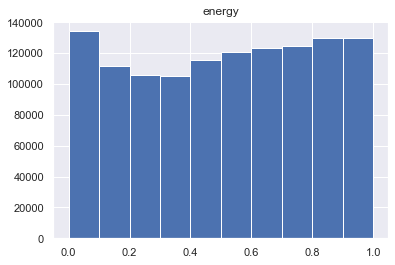

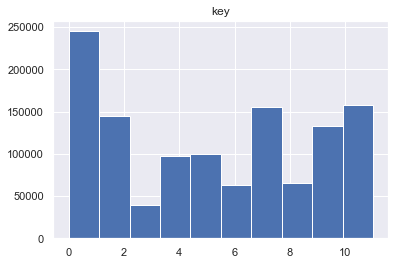

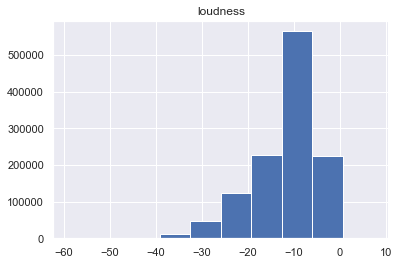

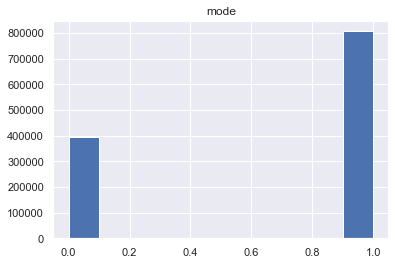

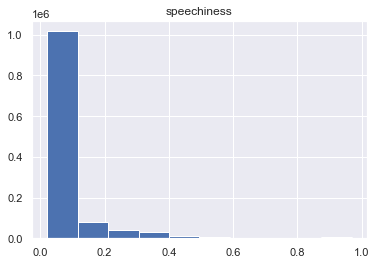

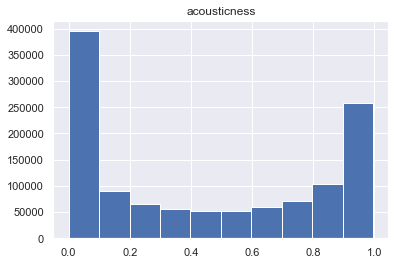

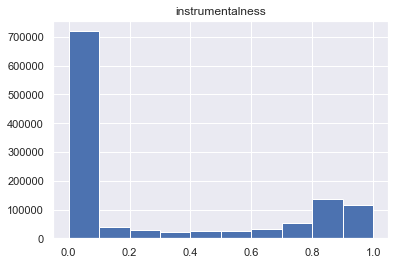

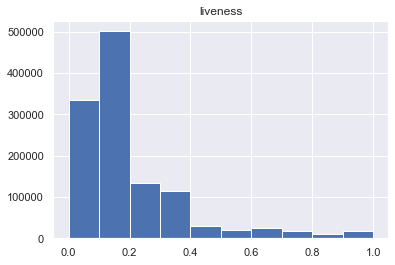

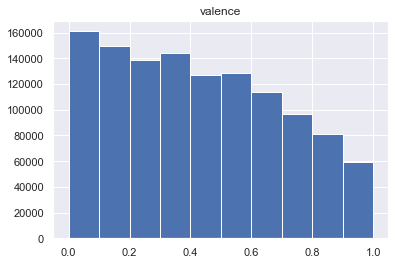

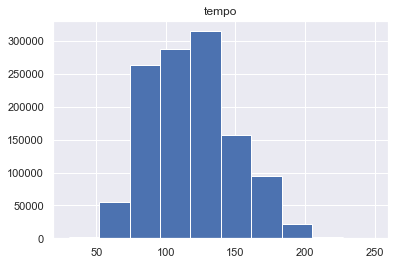

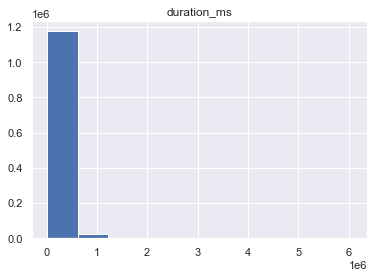

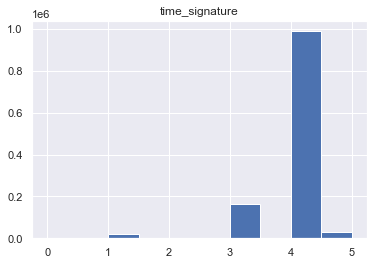

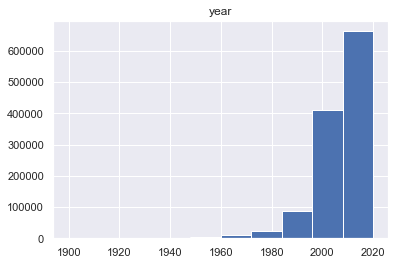

In [43]:
# Histograms of all the revelant features

for col in df:
    df.hist(column = col)

In [44]:
# Feature Scaling

cols_to_norm = ['explicit', 'danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness', 
                'liveness','valence','tempo','duration_ms','time_signature','year']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())

Feature scaling data is necessary for clustering algorithms because otherwise the **range of values** in each feature will **act as a weight** when determining how to cluster data, which is typically undesired. 

## <font color=red> Feature Extraction and Learning </font>

Lets use a dimensionality reduction technique such as **PCA** before applying our clustering algorithms. The reduced number of features will help us yield **more accurate results** and also **reduce noise**. 

In [4]:
reduced_df = df.sample(n = 10000)
pca = PCA()
pca.fit(reduced_df)

NameError: name 'df' is not defined

An unforseen issue was the computational time it would take to cluster over 1.2M samples. My current PC can not compute the clusters fast enough, thus forcing me to reduce the dataset to a manageable size.

In [70]:
pca.explained_variance_ratio_

array([0.23510229, 0.09431634, 0.09157015, 0.07729349, 0.07251398,
       0.06888283, 0.05988982, 0.05759405, 0.05485904, 0.04985393,
       0.04789598, 0.0385388 , 0.02553942, 0.01880273, 0.00734713])

Text(0, 0.5, 'Cumulative Explained Variance')

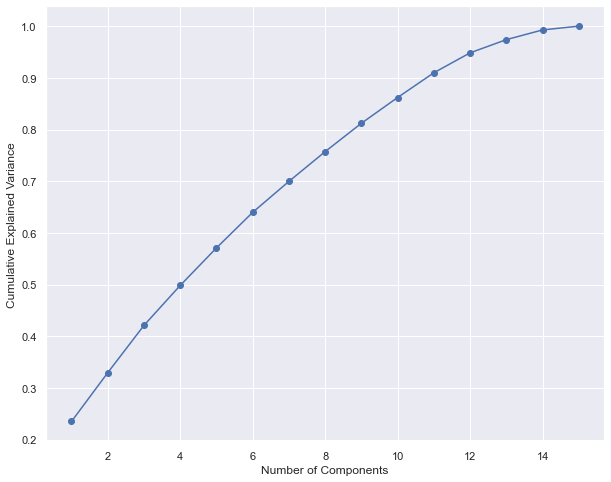

In [71]:
plt.figure(figsize = (10,8))
plt.plot(range(1,16), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

A good rule of thumb is to choose the number of components that explain **atleast 80 %** of the variance in the dataset. For this particular project, lets choose **9** principal components as it is above the 80 % mark. 

In [72]:
# Fitting our dataset to our chosen number of principal components.

pca = PCA(n_components = 9)
pca.fit(reduced_df)

PCA(n_components=9)

In [73]:
pca.transform(reduced_df)
scores_pca = pca.transform(reduced_df)

We can now perform segmentation based on these **PCA scores instead of the original features.**

In [2]:
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [3]:
# call the function on the iris dataset
H = hopkins_statistic(scores_pca)
print(H)

NameError: name 'scores_pca' is not defined

## <font color=red> ML Clustering Algorithms </font>

The two types of clustering algorithms we are gonna use and compare are **K-Means Clustering** and **Hierarchical Clustering** respectively.

### <font color=blue> K - Means Clustering </font>

K - Means clustering is the most popular unsupervised learning algorithm. It is used to classify a given dataset through a certain number of clusters K, fixed beforehand. It works by assigning the N observations to K clusters, such that within each cluster **the average dissimilarity of observations** from the **cluster mean is minimized**. The **dissimilarity function** used here is the **Squared Euclidean Distance**. 

In [74]:
# ICV = Inter-Cluster Variance
ICV = []
for i in range(1,31):
    km_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 15)
    km_pca.fit(scores_pca)
    ICV.append(km_pca.inertia_)

**So how do find out the optimal K value?**

The performance of K - Means Clustering depends highly on the value of K. The most common technique to find the optimal value of K for the best performance is the **elbow method**. The method consists of plotting the **explained variation** as a function of the **number of clusters** and picking the elbow of the curve as the number of clusters to use. The elbow signifies the point where the dimishing returns (reduced inter-cluster variance) is no longer worth the additional cost (increased probability of of overfitting). 

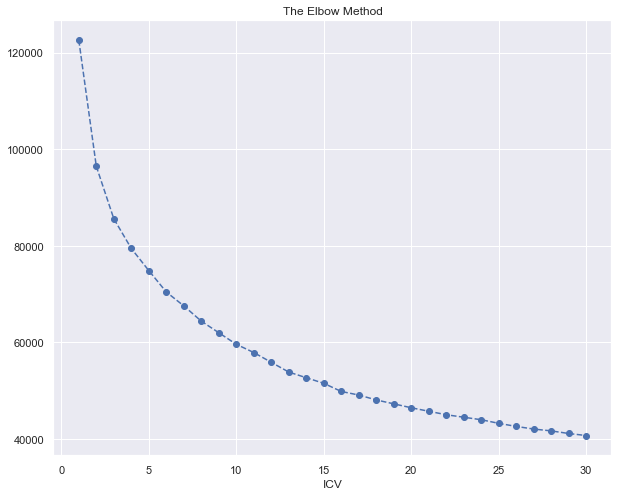

In [75]:
plt.figure(figsize = (10,8))
plt.plot(range(1,31), ICV, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.xlabel('ICV')
plt.title('The Elbow Method')
plt.show()

From my visual analysis, the 'elbow' point lies at the **7** cluster mark. 

In [76]:
km_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = 15)

In [77]:
km_pca.fit(scores_pca)

KMeans(n_clusters=7, random_state=15)

The algorithm works by randomly assigning a number from 1 to 7, to each of the observations. These serve as the initial cluster assignments for the observations.For each of the 7 clusters, we compute the **cluster centroid** (mean of all P features for the given cluster). We then assign each observation to the cluster closest to it using Euclidean Distance as the metric. The previous steps are repeated until convergence: the set of observations in each cluster doesn't change anymore.  

In [78]:
df_cluster = pd.DataFrame(scores_pca)
df_cluster.columns = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7',
                      'Component 8','Component 9']
df_cluster['Cluster_Number'] = km_pca.labels_
df_cluster.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Cluster_Number
0,-2.939501,0.010762,-0.979123,-0.440670,0.768708,0.026358,-0.052136,-0.765263,1.077319,0
1,4.457166,-0.855040,0.182165,0.977889,-0.954838,-1.133168,-0.233326,-0.413256,-0.690010,1
2,-1.825993,0.538031,-0.256895,0.301135,0.135769,0.319452,-0.525547,-1.908890,0.236950,0
3,-0.555483,0.482728,-0.621623,-1.176085,0.207104,-0.288589,0.458056,2.528878,-0.641101,2
4,-1.736197,0.317546,-0.180292,2.057926,1.537608,0.810262,-0.943248,-1.848008,-0.453317,5


**Here is the final dataset containing the 9 principal components used to map 10,000 samples to 7 clusters.** 

In [79]:
# Location of all the cluster centroids in the 9th dimension

km_pca.cluster_centers_

array([[-1.17270987,  0.11187093, -0.82342597,  0.06735916, -0.51911391,
         0.01107914,  0.10092927, -0.2791441 ,  0.32278433],
       [ 2.48575983, -0.0273846 ,  0.46190897,  0.32166526,  0.21436767,
        -1.32964308,  1.11322053, -0.40681079, -0.05054257],
       [-1.08677248,  0.4288504 ,  0.18723639, -1.24911808,  0.36550747,
        -0.11579643,  0.09879806,  0.06691237, -0.72460104],
       [ 0.63462814, -0.92660243, -1.17431217,  0.08972039,  0.40087359,
         0.27238021,  0.06612001,  0.1958846 ,  0.09784626],
       [-2.14055617, -1.8133088 ,  2.36559256,  0.55077552, -0.35371394,
         0.27366794,  0.13060014,  0.70706748,  0.24456786],
       [-0.94021942,  1.36398319,  0.27288901,  1.14186292,  0.60548319,
         0.02116728, -0.53090324, -0.17341613,  0.03090751],
       [ 2.50073051,  0.06154509,  0.26196901, -0.18994063, -0.31173999,
         0.50485741, -0.61607548,  0.18944594,  0.07263949]])

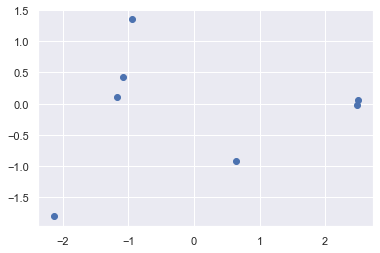

In [80]:
# The cluster centroid displayed using the first two principal components

plt.scatter(km_pca.cluster_centers_[:,0], km_pca.cluster_centers_[:,1])

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


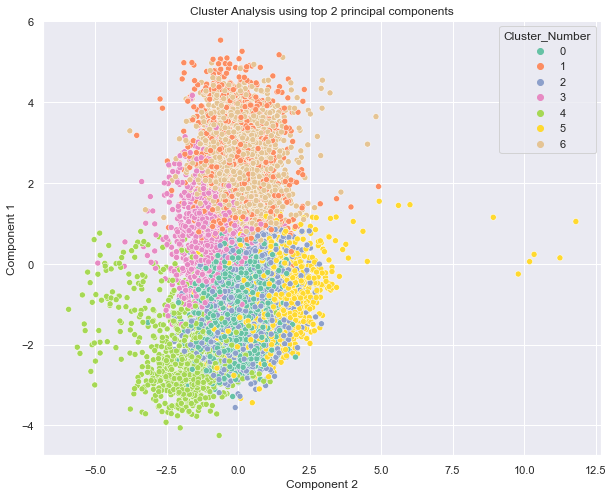

In [81]:
# Lets limit ourselves to the first 2 principal components so we may display some visualization

x_axis = df_cluster['Component 2']
y_axis = df_cluster['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_cluster['Cluster_Number'], palette = "Set2")
plt.title('Cluster Analysis using top 2 principal components')
plt.show()

There is alot of overlap as the first 2 principal components explain less than 35 % of the total variance in the dataset. The regions where they overlap are ultimately segmented by the other 7 principal components that can not be displayed graphically

In [82]:
inertia_value=[]
for i in range(1,21):
    km_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = i)
    km_pca.fit(scores_pca)
    y = km_pca.inertia_
    inertia_value.append(int(y))

print(min(inertia_value))

67273


The results obtained **depend highly** on the initial random cluster assignment of each observation. For this reason, we have run the algorithm multiple times with **different initial configurations**, and then selected the best one. The best one is the one which has the **least inertia** i.e. is a global minimum instead of a local one. 

The lesser the model inertia, the better fit it is. The inertia here might seem high, and could definetely be reduced by increasing the number of clusters. The drawback, however, is that we risk overfitting the model to the data, making it impractical in real life situations.

### <font color=blue> Hierarchical Clustering </font>

One **potential disadvantage** of K - Means Clustering is that it requires you to pre-specify the number of clusters. **Heirarchical Clustering** is an alternative approach that **doesn't require a predetermined K value**. Specifically, we use **bottom - up** or **agglomerative clustering**, which refers to the fact that a **dendrogram** is built starting from the leaves and combining clusters up the trunk. 

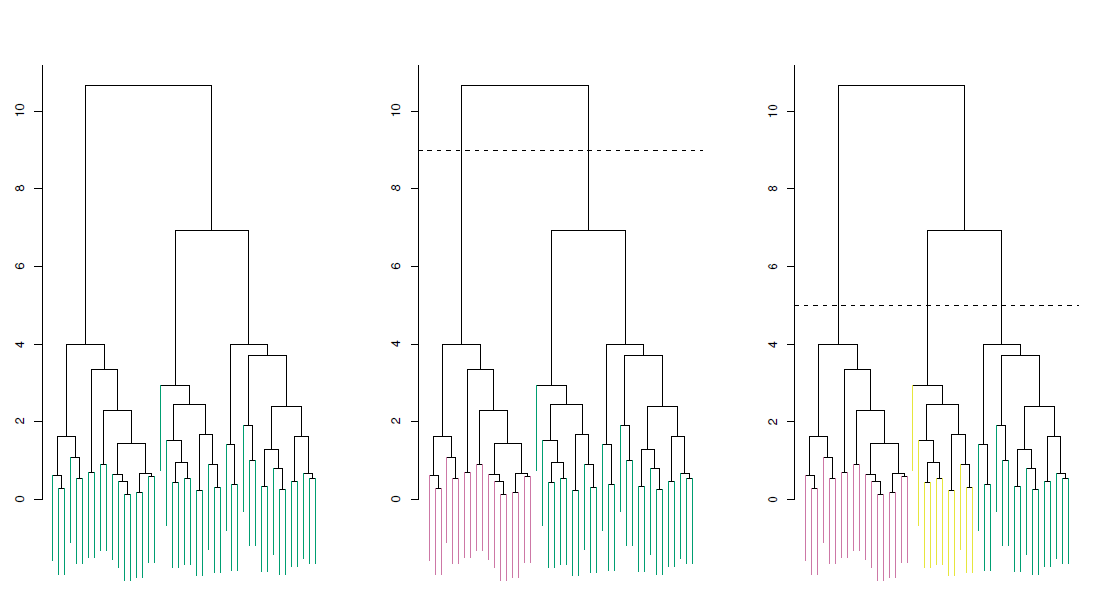

The three figures presented above are called **denograms**. At the bottom each leaf of the denogram can be considered an observation. As we move up, some of the leaves fuse into branches. These corresponds to the observations that are the most similar to each other. As we move up even higher, branches themselves fuse with other branches or leaves. **The eariler the fusion occurs, the more similar the group of observations are to each and vice versa**. Thus, similarity is represented as a function of the vertical height of the denogram. One such way to quantity similarity is by using **Euclidean Distance**. 
Our heirarchical clustering algorithm produces such a denogram. 

In [83]:
# Lets remove the cluster_number column from our previous analysis using K-Means Clustering

df_hierarchical = df_cluster.drop(['Cluster_Number'], axis = 1)

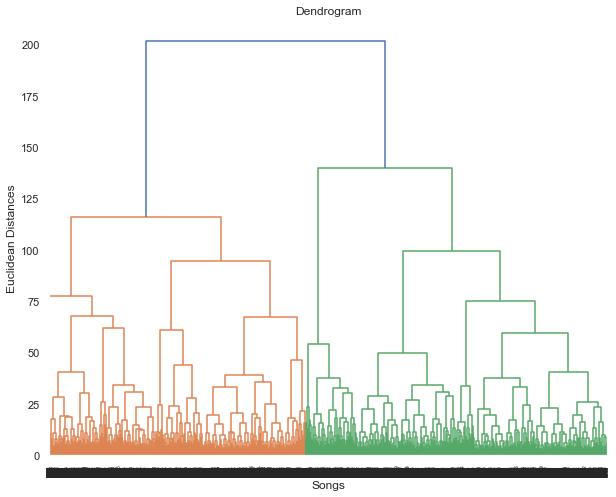

In [85]:
plt.figure(figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df_hierarchical, method = "ward"))
plt.title("Dendrogram")
plt.xlabel('Songs')
plt.ylabel('Euclidean Distances')
plt.show()

The height of the horizontal cut on a dendrogram serves the same purpose as K in K-Means Clustering. Thus, one single dendrogram can be used to draw inference on all possible clusters through the dataset. In practice, we can visually decide a sensible number of clusters, based on the heights of the fusion and the desired number of clusters.

In [126]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

Based on the dendrogram, a value of **3** seems sensible, despite being different from the **7** clusters used in  K-Means Clustering. The **dissimilarity measure** used here is **euclidean distance**. In order to define the dissimilarity between two groups of observations, we use **Wards Methods**. Ward's method analyzes the variance of cluster, instead of directly measuring the distance between them. This method is prefered over other linkage types for quantitative variables. 

In [127]:
y = cluster.fit_predict(df_hierarchical)
np.unique(y)

array([0, 1, 2], dtype=int64)

In [128]:
df_hierarchical['Cluster_Number'] = y
df_hierarchical.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Cluster_Number
0,-2.939501,0.010762,-0.979123,-0.440670,0.768708,0.026358,-0.052136,-0.765263,1.077319,1
1,4.457166,-0.855040,0.182165,0.977889,-0.954838,-1.133168,-0.233326,-0.413256,-0.690010,2
2,-1.825993,0.538031,-0.256895,0.301135,0.135769,0.319452,-0.525547,-1.908890,0.236950,1
3,-0.555483,0.482728,-0.621623,-1.176085,0.207104,-0.288589,0.458056,2.528878,-0.641101,2
4,-1.736197,0.317546,-0.180292,2.057926,1.537608,0.810262,-0.943248,-1.848008,-0.453317,1


In [129]:
(df_hierarchical.Cluster_Number == 0).sum()

2727

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


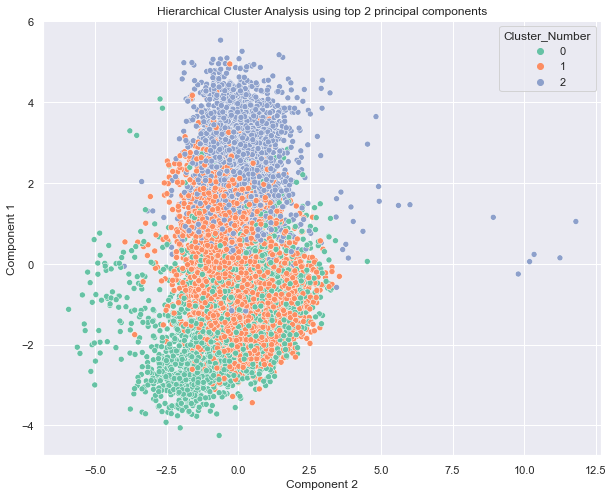

In [130]:
# Lets limit ourselves to the first two principal components.

x_axis = df_hierarchical['Component 2']
y_axis = df_hierarchical['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_hierarchical['Cluster_Number'], palette = 'Set2')
plt.title('Hierarchical Cluster Analysis using top 2 principal components')
plt.show()

There is alot of overlap as the first 2 principal components explain less than 35 % of the total variance in the dataset. The regions where they overlap are ultimately segmented by the other 7 principal components that can not be displayed graphically. The clusters for this algorithm, however, do seem more defined and separated compared to k means clustering. 

## <font color=red> Evaluation & Performance </font>

In unsupervised learning, such as clustering, there is usually no clear definition of error. Due to this, cross-validation cannot be used for this purpose.**Silhouette score** and **complexity analyis** are ,however, some metrics we can use for comparison.

### <font color=blue> Silhouette Score </font>

In [131]:
from sklearn.metrics import silhouette_score

The **silhouette score** is a metric used to calculate the goodness of a clustering technique. Its value ranges from [-1, 1]

**1**: The clusters are well apart from each other and clearly distinguished.

**0**: The clusters are poorly defined and close to each others decision boundaries

**-1**: The clusters are assigned in the wrong way.

The Silhouette Score is calculated as **(b-a)/max(a,b)**; where a = average intra cluster distance; b = average inter-cluster distance

In [113]:
for i in range(2,16):
    km_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 15)
    km_pca.fit(scores_pca)
    cluster_labels = km_pca.labels_
    silhouette_avg = silhouette_score(scores_pca, cluster_labels)
    print( "For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.22054523430563444
For n_clusters = 3 The average silhouette_score is : 0.22714643429264542
For n_clusters = 4 The average silhouette_score is : 0.1538551106424801
For n_clusters = 5 The average silhouette_score is : 0.15364278220431998
For n_clusters = 6 The average silhouette_score is : 0.1468872035978582
For n_clusters = 7 The average silhouette_score is : 0.1367412602875575
For n_clusters = 8 The average silhouette_score is : 0.1399078026318216
For n_clusters = 9 The average silhouette_score is : 0.13466010221870295
For n_clusters = 10 The average silhouette_score is : 0.13099280439593017
For n_clusters = 11 The average silhouette_score is : 0.12956962973649122
For n_clusters = 12 The average silhouette_score is : 0.13001229998293531
For n_clusters = 13 The average silhouette_score is : 0.13129975302427033
For n_clusters = 14 The average silhouette_score is : 0.1322991962471292
For n_clusters = 15 The average silhouette_score is

The silhouette score is highest for k = 3. Using the elbow method and choosing k = 7 clusters might have been the wrong approach for this dataset as its silhouette score is **0.13**. Nevertheless, a silhouette score of 0.227 is still poor. K-Means Clustering performs poorly on datasets where clusters are of varying sizes and densities. This might have been the reason for its low silhouette score. 

In [132]:
for i in range(2,16):
    cluster = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y = cluster.fit_predict(df_hierarchical)
    silhouette_avg = silhouette_score(df_hierarchical, y)
    print( "For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.22883010093560005
For n_clusters = 3 The average silhouette_score is : 0.2138502879149056
For n_clusters = 4 The average silhouette_score is : 0.15508145059888703
For n_clusters = 5 The average silhouette_score is : 0.12248991938170005
For n_clusters = 6 The average silhouette_score is : 0.12787858850480743
For n_clusters = 7 The average silhouette_score is : 0.12939981945840226
For n_clusters = 8 The average silhouette_score is : 0.12931569020903733
For n_clusters = 9 The average silhouette_score is : 0.12099003723609524
For n_clusters = 10 The average silhouette_score is : 0.12324382777234505
For n_clusters = 11 The average silhouette_score is : 0.10406729207093812
For n_clusters = 12 The average silhouette_score is : 0.10586926927264417
For n_clusters = 13 The average silhouette_score is : 0.11060093153854328
For n_clusters = 14 The average silhouette_score is : 0.11411937119756792
For n_clusters = 15 The average silhouette_scor

The silhouette score = **0.21** is the highest for n = 3 clusters, which is also the value we choose for hierarchical clustering. 

### <font color=blue> Complexity Comparison </font>

**K Means Clustering** is pretty computationally efficient with time complexity $O(nkt)$. The space complexity is $O(n+k)$.
n = number of instances; k = number of clusters; t = number of iterations. 

The time complexity of **hierarchical agglomerative clustering** is $O(n^{3})$. The space complexity is $O(n^{2})$. 
n = number of datapoints

So, K-Means Clustering definetely wins in this facet of comparison. 


## <font color=red> Conclusion </font>

**Small decision have big consequences when it comes to clustering.**

The number of clusters, linkage type, dissimilarity measure, and preprocessing details are all mostly subjective decisions based on your motivations and the dataset provided. Each of these questions have multiple answers can majorly effect your results. We need to try multiple choices in order to figure out the choice that gives us the most useful and interpretable solutions
. 

For this data, using a **Hierarchical Clustering** algorithm is preferred as its added versatility and flexibility earned it a higher silhouette score. 
Since, it can easily handle different dissimilarity and linkage functions, it is highly desirable for datasets where the clusters are of varying sizes and densities. Heirarchical clustering is also more graphically intuitive and provides us with more information as you can see the path of each data point and where the clusters are formed respectively. 

In retrospect, however, none of the clustering algorithms used above performed well. We would have to explore further, and use other clustering algorithms such as DBSCANS and Mean-shift Algorithms before we can make a definitive statement on the results.  

## <font color=red> Ethical Issues </font>

The dataset was collected using Spotify's API. The Spotify API is used to build recommendation systems that are designed to achieve a specific business objective, and the stock market and investors drive that objective. For example, the Spotify recommendation algorithm is notoriously known to recommend songs affiliated with major labels and artists even though they might be dissimilar to current songs you listen to. This creates an anti-competition feedback loop where international artists dominate the space. Local and cultural artists are progressively more excluded from exposure, which dilutes our cultural identities and weakens the creative space. This is a major ethical issue that strips us of our future choices. 

## <font color=red> Bibliography </font>

“2.3. Clustering — Scikit-Learn 0.23.1 Documentation.” Scikit-Learn.org, scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation.


Bhardwaj, Ashutosh. “Silhouette Coefficient : Validating Clustering Techniques.” Medium, 27 May 2020, towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c.

“Scipy.cluster.hierarchy.dendrogram — SciPy V1.9.3 Manual.” Docs.scipy.org, docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html. Accessed 19 Dec. 2022.

Distances between Clustering, Hierarchical Clustering 36-350, Data Mining. 2009.

“Sklearn.metrics.silhouette_score — Scikit-Learn 0.21.3 Documentation.” Scikit-Learn.org, 2019, scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html.

“Sklearn.cluster.AgglomerativeClustering.” Scikit-Learn, scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html.

“Scipy.cluster.hierarchy.dendrogram — SciPy V1.9.3 Manual.” Docs.scipy.org, docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html. Accessed 19 Dec. 2022.

Abbas, Osama Abu. “Comparisons Between Data Clustering Algorithms.” International Arab Journal of Information Technology, vol. 5, no. 3, 2008, pp. 320–25.


“Spotify 1.2M+ Songs.” www.kaggle.com, www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs.

Wikipedia Contributors. “Elbow Method (Clustering).” Wikipedia, Wikimedia Foundation, 30 Mar. 2019, en.wikipedia.org/wiki/Elbow_method_(clustering).

Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning : with Applications in R. New York :Springer, 2013.